# Abalone Age Prediction

### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

### Loading the dataset

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Adding the Age column

Age is obtained by adding 1.5 to the value of rings

In [4]:
df['Age'] = df['Rings'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Performing Univariate Analysis

##### Using distplot

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

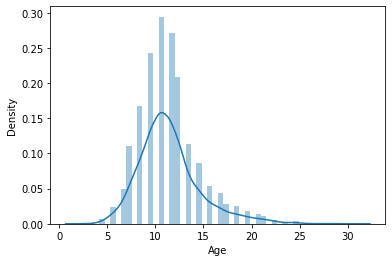

In [5]:
sb.distplot(df.Age)

##### Using pie chart

<AxesSubplot:ylabel='Sex'>

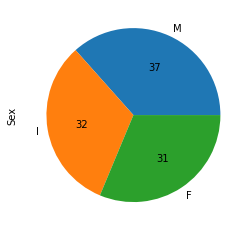

In [6]:
df['Sex'].value_counts().plot(kind='pie', autopct='%.0f')

### Performing Bivariate Analysis

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Age'>

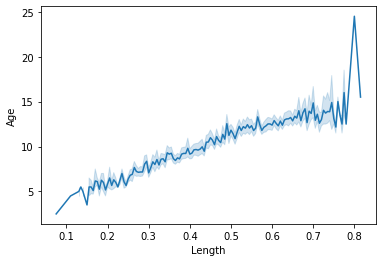

In [7]:
sb.lineplot(df.Length, df.Age)

### Performing Multi-variate Analysis

##### Using pairplot

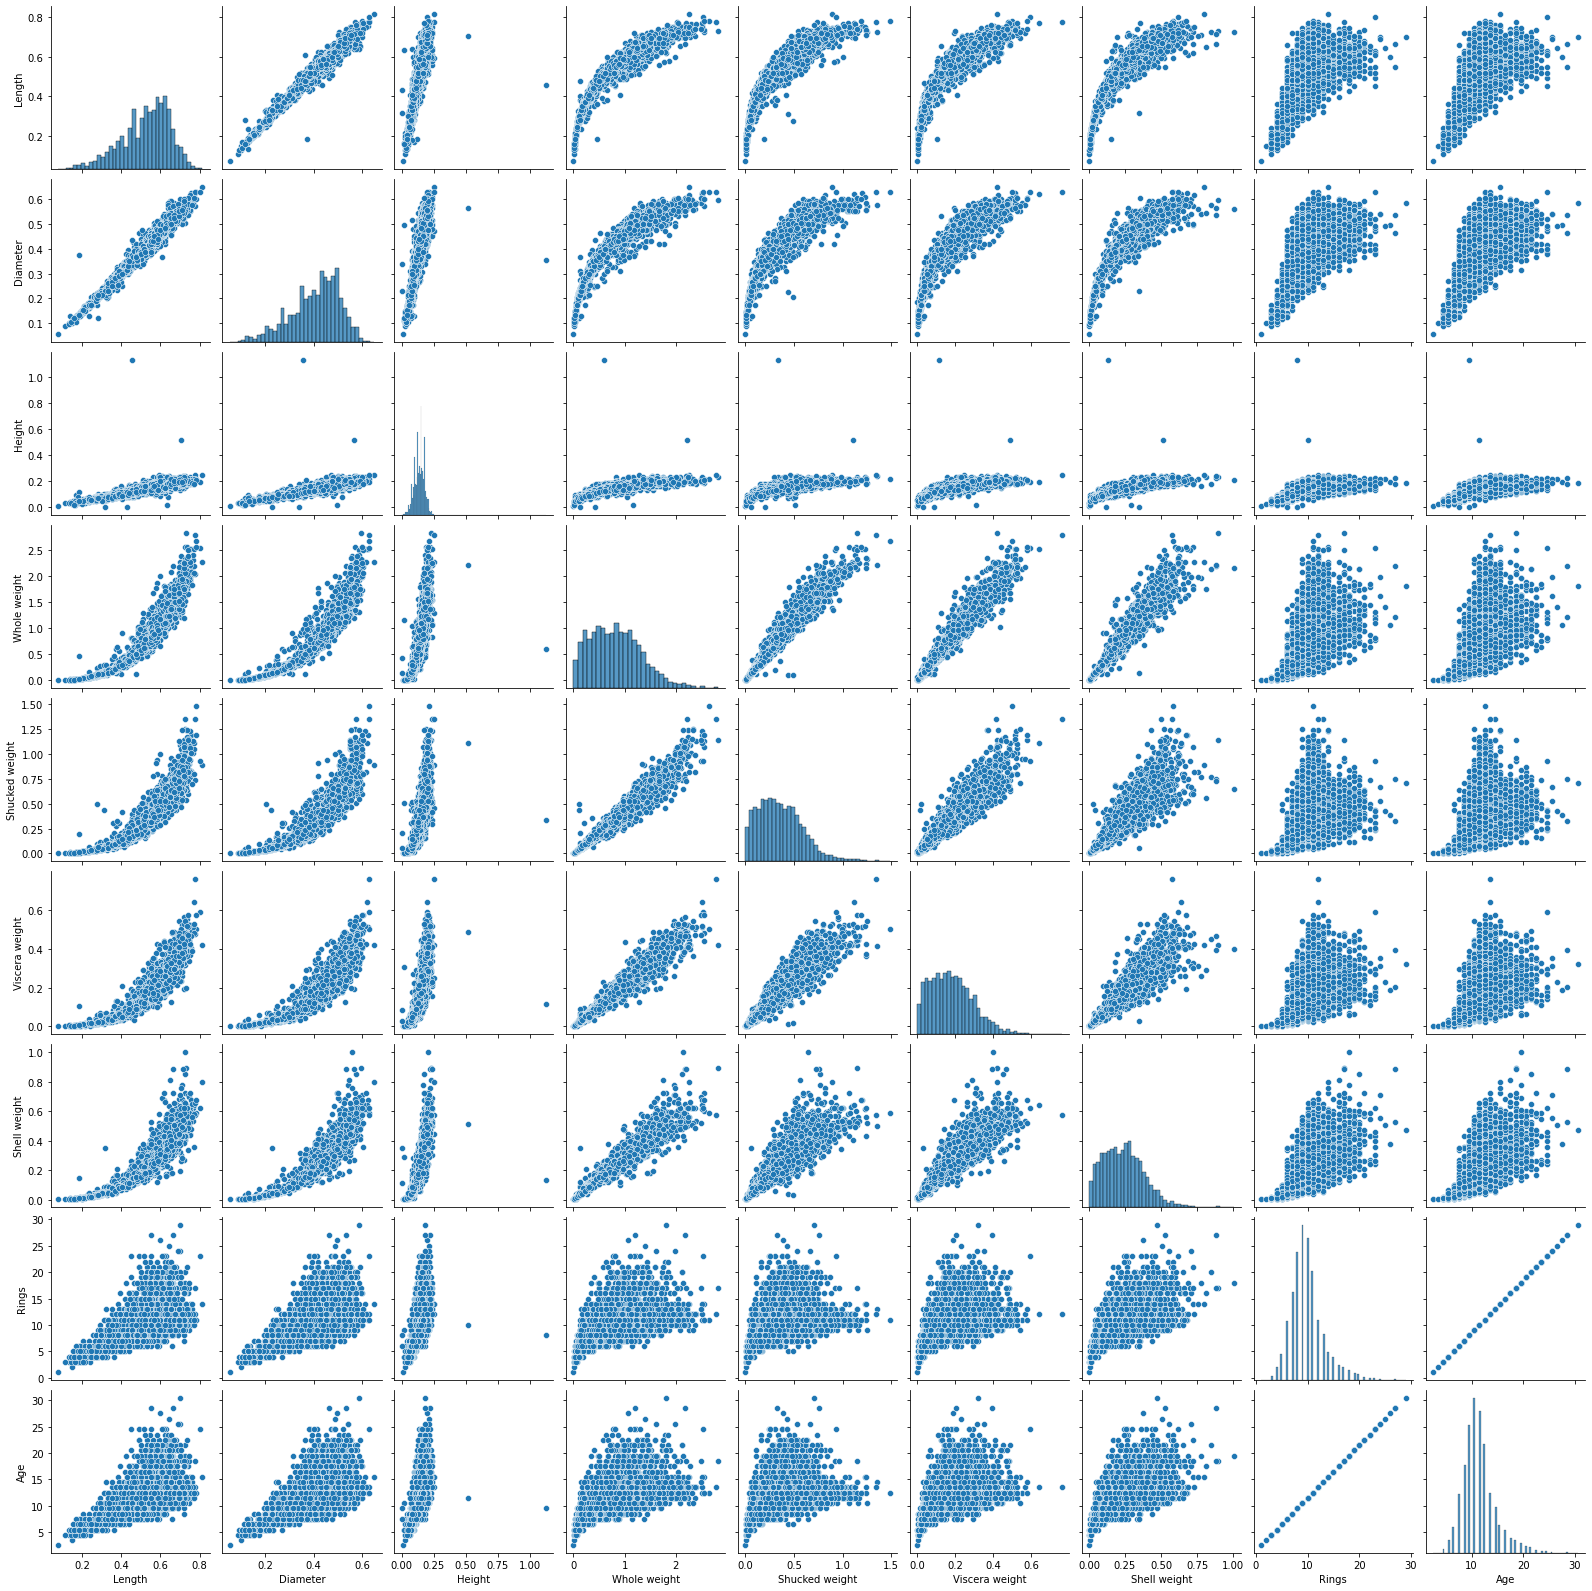

In [8]:
sb.pairplot(df.drop(df.Rings))

##### Using heatmap

<AxesSubplot:>

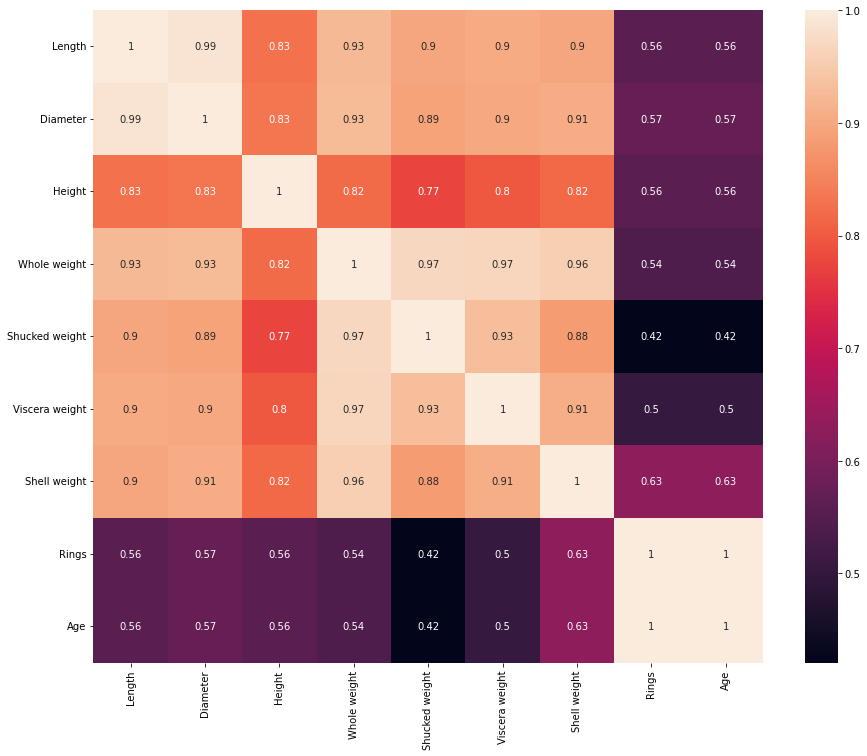

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
sb.heatmap(df.corr(), annot=True, ax=ax)

#### Using lineplot

<AxesSubplot:xlabel='Length', ylabel='Age'>

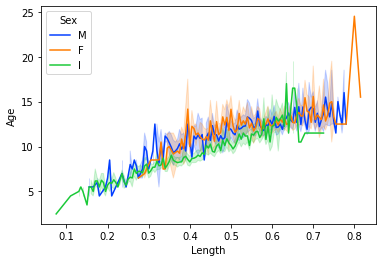

In [10]:
sb.lineplot( x='Length', y='Age', data=df, palette='bright', hue='Sex')

### Performing Descriptive Statistics on the Dataset

In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


### Handling Missing Values

In [12]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

#### There are no missing values in the dataset. So no replacement or filling in is needed

### Finding Outliers and Replacing the Outliers

#### Outlier Detection

In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

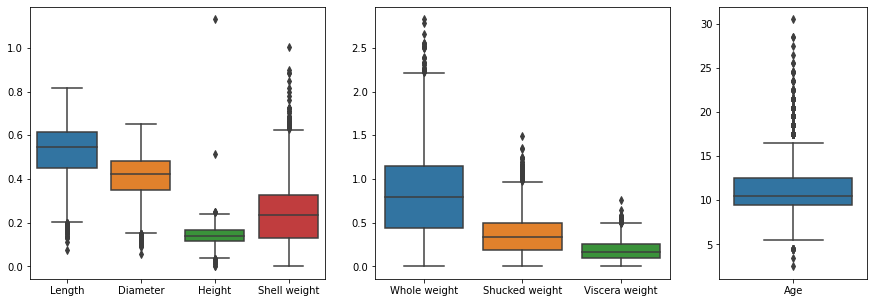

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 2, 1]})
sb.boxplot(data=df[['Length', 'Diameter', 'Height', 'Shell weight']], ax=axes[0])
sb.boxplot(data=df[['Whole weight', 'Shucked weight', 'Viscera weight']], ax=axes[1])
sb.boxplot(data=df[['Age']], ax=axes[2])
plt.show()

There are outliers in the columns 'Length', 'Diameter', 'Height', 'Shell weight', 'Whole weight', 'Shucked weight', 'Viscera weight' and 'Age'. They have to be replaced separately.

##### Outliers Replacement in 'Age' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

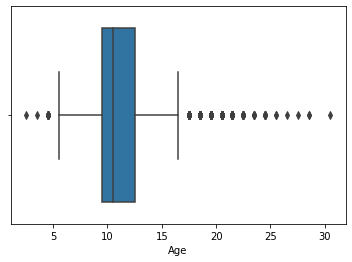

In [15]:
sb.boxplot(df.Age)

In [16]:
Q1_Age = df.Age.quantile(0.25)
Q3_Age = df.Age.quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_limit_Age = Q1_Age - 1.5*IQR_Age
upper_limit_Age = Q3_Age + 1.5*IQR_Age

In [17]:
df['Age'].median()

10.5

In [18]:
df['Age'] = np.where(df['Age'] > upper_limit_Age, df['Age'].median(), df['Age'])
df['Age'] = np.where(df['Age'] < lower_limit_Age, df['Age'].median(), df['Age'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

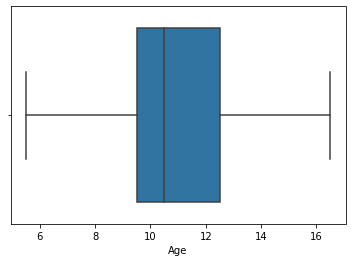

In [19]:
sb.boxplot(df.Age)

In [20]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Length' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

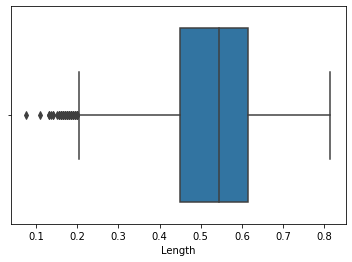

In [21]:
sb.boxplot(df.Length)

In [22]:
Q1_Length = df.Length.quantile(0.25)
Q3_Length = df.Length.quantile(0.75)
IQR_Length = Q3_Length - Q1_Length
lower_limit_Length = Q1_Length - 1.5*IQR_Length
upper_limit_Length = Q3_Length + 1.5*IQR_Length

In [23]:
df['Length'].median()

0.545

In [24]:
df['Length'] = np.where(df['Length'] < lower_limit_Length, df['Length'].mean(), df['Length'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

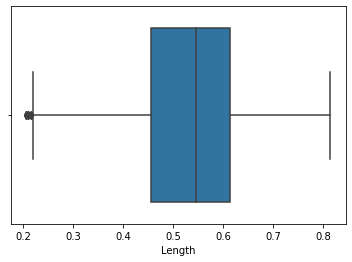

In [25]:
sb.boxplot(df.Length)

In [26]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Diameter' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

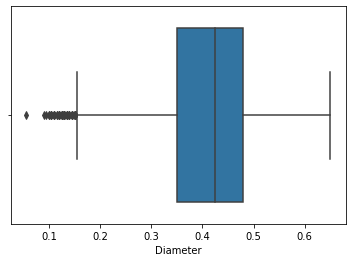

In [27]:
sb.boxplot(df.Diameter)

In [28]:
Q1_Diameter = df.Diameter.quantile(0.25)
Q3_Diameter = df.Diameter.quantile(0.75)
IQR_Diameter = Q3_Diameter - Q1_Diameter
lower_limit_Diameter = Q1_Diameter - 1.5*IQR_Diameter
upper_limit_Diameter = Q3_Diameter + 1.5*IQR_Diameter

In [29]:
df['Diameter'].median()

0.425

In [30]:
df['Diameter'] = np.where(df['Diameter'] < lower_limit_Diameter, df['Diameter'].median(), df['Diameter'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diameter'>

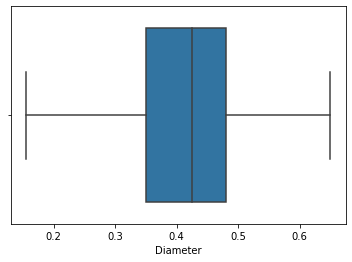

In [31]:
sb.boxplot(df.Diameter)

In [32]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Height' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

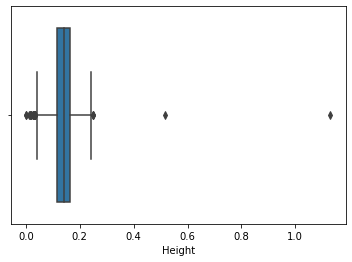

In [33]:
sb.boxplot(df.Height)

In [34]:
Q1_Height = df.Height.quantile(0.25)
Q3_Height = df.Height.quantile(0.75)
IQR_Height = Q3_Height - Q1_Height
lower_limit_Height = Q1_Height - 1.5*IQR_Height
upper_limit_Height = Q3_Height + 1.5*IQR_Height

In [35]:
df['Height'].median()

0.14

In [36]:
df['Height'] = np.where(df['Height'] < lower_limit_Height, df['Height'].median(), df['Height'])
df['Height'] = np.where(df['Height'] > upper_limit_Height, df['Height'].median(), df['Height'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

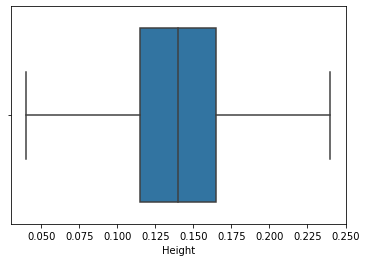

In [37]:
sb.boxplot(df.Height)

In [38]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Whole weight' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Whole weight'>

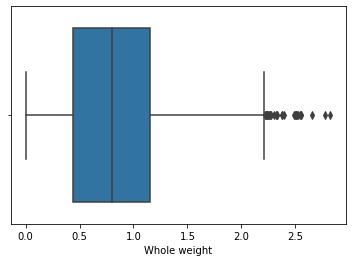

In [39]:
sb.boxplot(df['Whole weight'])

In [40]:
Q1_ww = df['Whole weight'].quantile(0.25)
Q3_ww = df['Whole weight'].quantile(0.75)
IQR_ww = Q3_ww - Q1_ww
lower_limit_ww = Q1_ww - 1.5*IQR_ww
upper_limit_ww = Q3_ww + 1.5*IQR_ww

In [41]:
df['Whole weight'].median()

0.7995

In [42]:
df['Whole weight'] = np.where(df['Whole weight'] > upper_limit_ww, df['Whole weight'].median(), df['Whole weight'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Whole weight'>

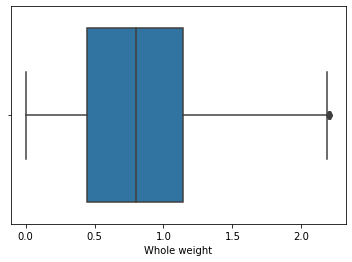

In [43]:
sb.boxplot(df['Whole weight'])

In [44]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Shucked weight' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight'>

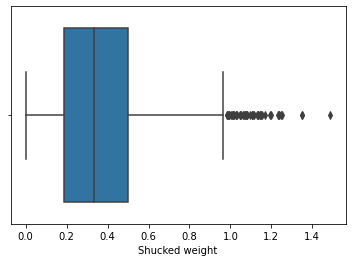

In [45]:
sb.boxplot(df['Shucked weight'])

In [46]:
Q1_sw = df['Shucked weight'].quantile(0.25)
Q3_sw = df['Shucked weight'].quantile(0.75)
IQR_sw = Q3_sw - Q1_sw
lower_limit_sw = Q1_sw - 1.5*IQR_sw
upper_limit_sw = Q3_sw + 1.5*IQR_sw

In [47]:
df['Shucked weight'].median()

0.336

In [48]:
df['Shucked weight'] = np.where(df['Shucked weight'] > upper_limit_sw, df['Shucked weight'].median(), df['Shucked weight'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shucked weight'>

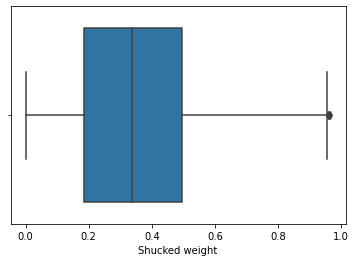

In [49]:
sb.boxplot(df['Shucked weight'])

In [50]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Height' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

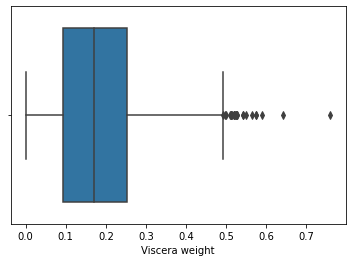

In [51]:
sb.boxplot(df['Viscera weight'])

In [52]:
Q1_vw = df['Viscera weight'].quantile(0.25)
Q3_vw = df['Viscera weight'].quantile(0.75)
IQR_vw = Q3_vw - Q1_vw
lower_limit_vw = Q1_vw - 1.5*IQR_vw
upper_limit_vw = Q3_vw + 1.5*IQR_vw

In [53]:
df['Viscera weight'].median()

0.171

In [54]:
df['Viscera weight'] = np.where(df['Viscera weight'] > upper_limit_vw, df['Viscera weight'].median(), df['Viscera weight'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Viscera weight'>

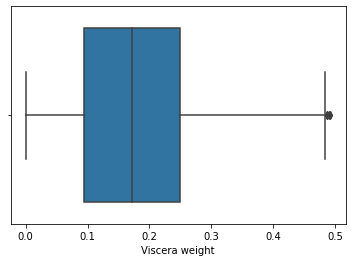

In [55]:
sb.boxplot(df['Viscera weight'])

In [56]:
df.shape

(4177, 10)

##### Outliers Replacement in 'Height' column

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell weight'>

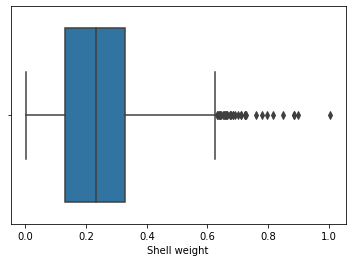

In [57]:
sb.boxplot(df['Shell weight'])

In [58]:
Q1_shellw = df['Shell weight'].quantile(0.25)
Q3_shellw = df['Shell weight'].quantile(0.75)
IQR_shellw = Q3_shellw - Q1_shellw
lower_limit_shellw = Q1_shellw - 1.5*IQR_shellw
upper_limit_shellw = Q3_shellw + 1.5*IQR_shellw

In [59]:
df['Shell weight'].median()

0.234

In [60]:
df['Shell weight'] = np.where(df['Shell weight'] < lower_limit_shellw, df['Shell weight'].median(), df['Shell weight'])
df['Shell weight'] = np.where(df['Shell weight'] > upper_limit_shellw, df['Shell weight'].median(), df['Shell weight'])

C:\Users\Sys\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Shell weight'>

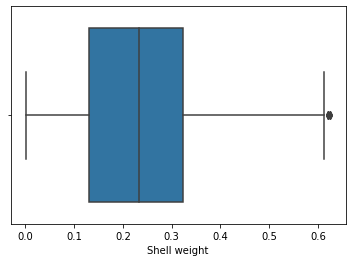

In [61]:
sb.boxplot(df['Shell weight'])

In [62]:
df.shape

(4177, 10)

### Encoding

##### Label Encoding

In [63]:
le = LabelEncoder()

In [64]:
df.Sex = le.fit_transform(df.Sex)

In [65]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Splitting the data into Dependent and Independent Variables

In [66]:
# Independent Variable: X

X = df.drop(columns=['Rings', 'Age'], axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [67]:
# Dependent Variable (Target): Y

Y = df.Rings
Y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

### Scaling

In [68]:
X_scaled = pd.DataFrame(scale(X.drop(columns=['Sex'], axis=1)), columns=X.drop(columns=['Sex'], axis=1).columns)
X_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.643399,-0.504337,-1.198563,-0.643135,-0.610624,-0.731030,-0.643562
1,-1.567005,-1.575453,-1.332413,-1.255047,-1.216618,-1.227621,-1.251041
2,0.016319,0.084776,-0.127762,-0.297410,-0.455489,-0.347946,-0.187952
3,-0.775343,-0.504337,-0.395462,-0.638893,-0.654255,-0.608065,-0.605594
4,-1.742930,-1.682564,-1.600113,-1.298528,-1.265097,-1.312751,-1.364944


### Splitting the Data into Training and Testing Data

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=0)

In [70]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,))

### Building, Training, Testing and Measuring the performance using Metrics for various models

#### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

# Building the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Testing the model
Y_pred1 = lin_reg.predict(X_test)

# Performance Measurement
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred1))
print("R2 Score:", r2_score(Y_test, Y_pred1))

Mean Squared Error: 6.043583343006813
R2 Score: 0.42676870159936153


#### Support Vector Machine (Regression)

In [72]:
from sklearn.svm import SVR

# Building the model
svm = SVR(kernel='rbf')
svm.fit(X_train, Y_train)

# Testing the model
Y_pred2 = svm.predict(X_test)

# Performance Measurement
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred2))
print("R2 Score:", r2_score(Y_test, Y_pred2))

Mean Squared Error: 5.058552128612196
R2 Score: 0.5201984915013997


#### Bayesian Ridge

In [73]:
from sklearn.linear_model import BayesianRidge

# Building the model
br = BayesianRidge()
br.fit(X_train, Y_train)

# Testing the model
Y_pred3 = br.predict(X_test)

# Performance Measurement
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred3))
print("R2 Score:", r2_score(Y_test, Y_pred3))

Mean Squared Error: 6.038089298766161
R2 Score: 0.42728980934865457


#### Ridge

In [74]:
from sklearn.linear_model import Ridge

# Building the model
ridge = Ridge()
ridge.fit(X_train, Y_train)

# Testing the model
Y_pred4 = ridge.predict(X_test)

# Performance Measurement
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred4))
print("R2 Score:", r2_score(Y_test, Y_pred4))

Mean Squared Error: 6.042098973366852
R2 Score: 0.42690949342562234


#### Lasso

In [75]:
from sklearn.linear_model import Lasso

# Building the model
lasso = Lasso()
lasso.fit(X_train, Y_train)

# Testing the model
Y_pred5 = lasso.predict(X_test)

# Performance Measurement
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred5))
print("R2 Score:", r2_score(Y_test, Y_pred5))

Mean Squared Error: 7.646345475578734
R2 Score: 0.2747473979890305


### The best score is given by Support Vector Machine model

<div style="text-align:right;">Submitted by <br>
<b> Blessy Karunya J </b><br>
<b> (Roll No.: 917719C012) </b></div>